In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pylab as plt

import os
import numpy as np
import pandas as pd

paper_folder = '../../cogsci-paper/'

In [2]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors


# def make_colormap(seq):
#     """Return a LinearSegmentedColormap
#     seq: a sequence of floats and RGB-tuples. The floats should be increasing
#     and in the interval (0,1).
#     """
#     seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
#     cdict = {'red': [], 'green': [], 'blue': []}
#     for i, item in enumerate(seq):
#         if isinstance(item, float):
#             r1, g1, b1 = seq[i - 1]
#             r2, g2, b2 = seq[i + 1]
#             cdict['red'].append([item, r1, r2])
#             cdict['green'].append([item, g1, g2])
#             cdict['blue'].append([item, b1, b2])
#     return mcolors.LinearSegmentedColormap('CustomMap', cdict)
# c = mcolors.ColorConverter().to_rgb
# cmap = make_colormap(
#     [c('blue'), c('yellow'), 0.5, c('yellow'), c('red')]
# )

In [2]:
def plot_results(results, category_trials, exemplar_trials, title, 
                 nb_lines, size, cmap=plt.cm.Blues, savefile=None):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=size)
    fig.suptitle(title, fontsize=24)
    
    # Contour plot
    C, E = np.meshgrid(category_trials, exemplar_trials)
    CS = axes[0].contour(C, E, results.T, levels=np.linspace(0., 1., nb_lines), cmap=cmap)
    axes[0].clabel(CS, inline=1, fontsize=10)
    axes[0].set_ylabel('# Exemplars', fontsize=18)
    axes[0].set_xlabel('# Categories', fontsize=18)
    axes[0].set_xscale("log", basex=2)
    axes[0].set_xticklabels([0,2,4,8,16,32])
    axes[0].set_yticks(exemplar_trials)
    axes[0].set_yticklabels(exemplar_trials, fontsize=15)
    axes[0].tick_params(labelsize=13)
    
    # Heatmap plot
    heatmap = axes[1].pcolor(results.T, alpha=0.8, vmin=0., vmax=1., cmap=cmap)
    # turn off the frame
    axes[1].set_frame_on(False)
    # put the major ticks at the middle of each cell
    axes[1].set_yticks(np.arange(results.shape[0])+0.5, minor=False)
    axes[1].set_xticks(np.arange(results.shape[1])+0.5, minor=False)
    # set values for x and y axis ticks
    axes[1].set_xticklabels(category_trials, fontsize=15) 
    axes[1].set_yticklabels(exemplar_trials, fontsize=15)
    axes[1].tick_params(labelsize=13)
    # set plot title and axis labels
    axes[1].set_xlabel('# Categories', fontsize=18)
    axes[1].set_ylabel('# Exemplars', fontsize=18)
    cbar = plt.colorbar(heatmap)
    cbar.set_label('Accuracy', rotation=270, fontsize=20, labelpad=25)
    
    plt.tight_layout(pad=3.5, w_pad=1.8)
    if savefile is not None:
        plt.savefig(
            savefile, 
            format='pdf',
            bbox_inches='tight'
        )
    else:
        plt.show()

# MLP Results

In [36]:
folder = '../results/mlp_results_combined/'
results_o1_gen = np.load(os.path.join(folder, 'results_o1_gen.npy'))
results_o2_gen = np.load(os.path.join(folder, 'results_o2_gen.npy'))
category_trials = np.load(os.path.join(folder, 'category_trials.npy'))
exemplar_trials = np.load(os.path.join(folder, 'exemplar_trials.npy'))

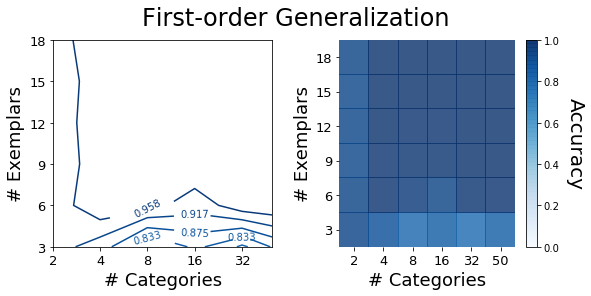

In [37]:
plot_results(
    results_o1_gen.mean(axis=2), 
    category_trials, 
    exemplar_trials, 
    title='First-order Generalization',
    nb_lines=25,
    size=(9,4.5),
    cmap=plt.cm.Blues,
    savefile=os.path.join(paper_folder, 'figures/mlp_o1_acc.pdf')
)

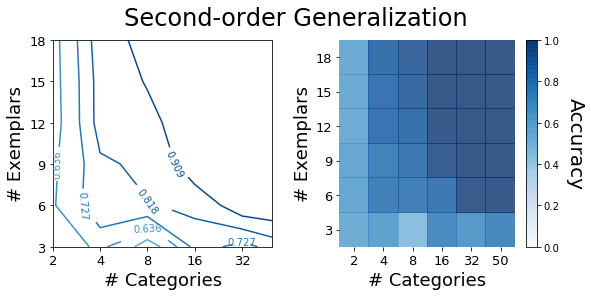

In [23]:
plot_results(
    results_o2_gen.mean(axis=2), 
    category_trials, 
    exemplar_trials, 
    title='Second-order Generalization',
    nb_lines=12,
    size=(9,4.5),
    cmap=plt.cm.Blues,
    savefile=os.path.join(paper_folder, 'figures/mlp_o2_acc.pdf')
)

# MLP w/ Noise=10%

In [7]:
folder = '../results/mlp_results_combined_n10/'
results_o1_gen = np.load(os.path.join(folder, 'results_o1_gen.npy'))
results_o2_gen = np.load(os.path.join(folder, 'results_o2_gen.npy'))
category_trials = np.load(os.path.join(folder, 'category_trials.npy'))
exemplar_trials = np.load(os.path.join(folder, 'exemplar_trials.npy'))

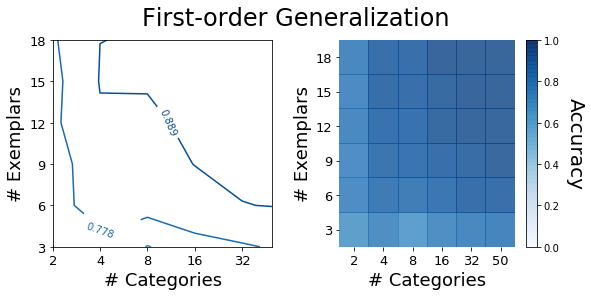

In [8]:
plot_results(
    results_o1_gen.mean(axis=2), 
    category_trials, 
    exemplar_trials, 
    title='First-order Generalization',
    nb_lines=10,
    size=(9,4.5),
    cmap=plt.cm.Blues
)

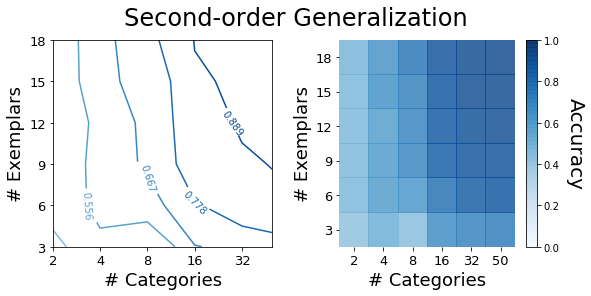

In [9]:
plot_results(
    results_o2_gen.mean(axis=2), 
    category_trials, 
    exemplar_trials, 
    title='Second-order Generalization',
    nb_lines=10,
    size=(9,4.5)
)

# MLP w/out noise, different train-test splits each run

In [3]:
folder = '../results/mlp_results_combined1/'
results_o1_gen = np.load(os.path.join(folder, 'results_o1_gen.npy'))
results_o2_gen = np.load(os.path.join(folder, 'results_o2_gen.npy'))
category_trials = np.load(os.path.join(folder, 'category_trials.npy'))
exemplar_trials = np.load(os.path.join(folder, 'exemplar_trials.npy'))

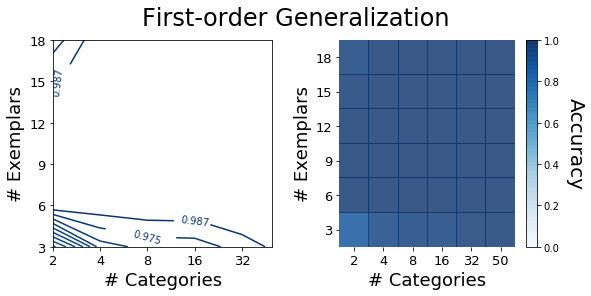

In [4]:
plot_results(
    results_o1_gen.mean(axis=2), 
    category_trials, 
    exemplar_trials, 
    title='First-order Generalization',
    nb_lines=80,
    size=(9,4.5),
    cmap=plt.cm.Blues,
    savefile=os.path.join(paper_folder, 'figures/mlp_o1_acc.pdf')
)

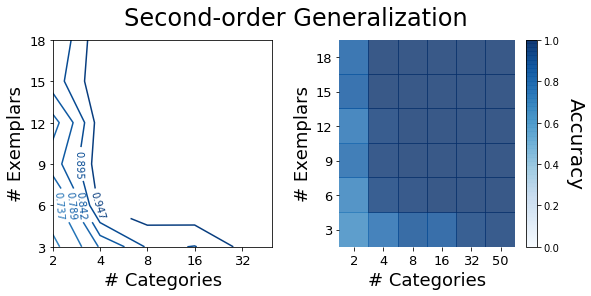

In [5]:
plot_results(
    results_o2_gen.mean(axis=2), 
    category_trials, 
    exemplar_trials, 
    title='Second-order Generalization',
    nb_lines=20,
    size=(9,4.5),
    savefile=os.path.join(paper_folder, 'figures/mlp_o2_acc.pdf')
)

# CNN Results

In [42]:
folder = '../results/cnn_results_combined/'
results_o1_gen = np.load(os.path.join(folder, 'results_o1_gen.npy'))
results_o1_acc = np.load(os.path.join(folder, 'results_o1_acc.npy'))
results_o2_gen = np.load(os.path.join(folder, 'results_o2_gen.npy'))
category_trials = np.load(os.path.join(folder, 'category_trials.npy'))
exemplar_trials = np.load(os.path.join(folder, 'exemplar_trials.npy'))

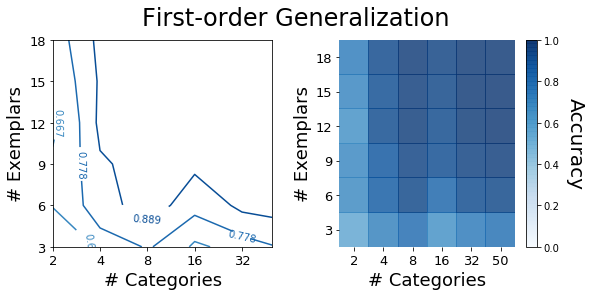

In [28]:
plot_results(
    results_o1_gen.mean(axis=2), 
    category_trials, 
    exemplar_trials, 
    title='First-order Generalization',
    nb_lines=10,
    size=(9,4.5),
    savefile=os.path.join(paper_folder, 'figures/cnn_o1_acc.pdf')
)

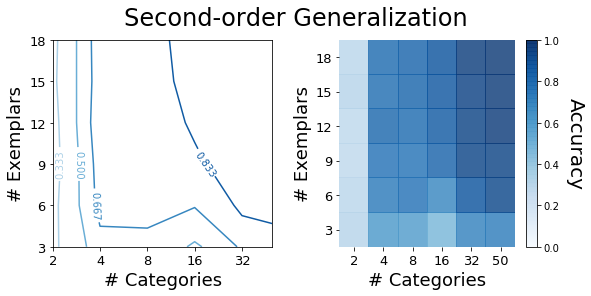

In [29]:
plot_results(
    results_o2_gen.mean(axis=2), 
    category_trials, 
    exemplar_trials, 
    title='Second-order Generalization',
    nb_lines=7,
    size=(9,4.5),
    savefile=os.path.join(paper_folder, 'figures/cnn_o2_acc.pdf')
)

# CNN w/ different train/test split of features each training run

In [57]:
folder = '../results/cnn_results_combined1/'
results_o1_gen = np.load(os.path.join(folder, 'results_o1_gen.npy'))
results_o2_gen = np.load(os.path.join(folder, 'results_o2_gen.npy'))
category_trials = np.load(os.path.join(folder, 'category_trials.npy'))
exemplar_trials = np.load(os.path.join(folder, 'exemplar_trials.npy'))

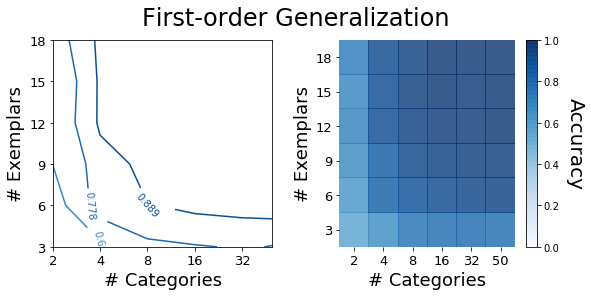

In [58]:
plot_results(
    results_o1_gen.mean(axis=2), 
    category_trials, 
    exemplar_trials, 
    title='First-order Generalization',
    nb_lines=10,
    size=(9,4.5),
    savefile=os.path.join(paper_folder, 'figures/cnn_o1_acc.pdf')
)

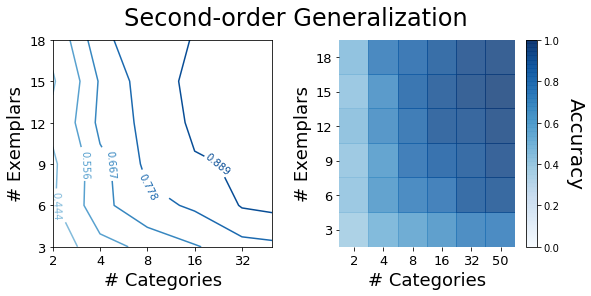

In [59]:
plot_results(
    results_o2_gen.mean(axis=2), 
    category_trials, 
    exemplar_trials, 
    title='Second-order Generalization',
    nb_lines=10,
    size=(9,4.5),
    savefile=os.path.join(paper_folder, 'figures/cnn_o2_acc.pdf')
)